## Investigation of the Stroop Effect

Author: Daniel Pipkin

In [1]:
# Imports for python
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

1) **What is our independent variable? What is our dependent variable?**

Our independent variable is whether the task has the congruent or incongruent condition. Basically we are trying to figure out if there is a difference between those two conditions. The dependent variable, time, is what we are going to test to see if it changes in relation to our conditions.

2) **What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

Because our null hypothesis (H<sub>0</sub>) is usually saying that nothing changes, a good null hypothesis might be that there is no change in the times for the two tasks. However, based on past experiences with the Stroop task, my alternative hypothesis (H<sub>A</sub>) would be that it takes more time to do the incongruent task. It's hard to say the color without reading the associated word. We are guessing that that the incongruent-task times will be greater than the congruent-task times. Because of this one-sided H<sub>A</sub>, H<sub>0</sub> must match by being one-sided.  
The sample means are easy to figure out and we could just compare those and say that if the average incongruent-task time is longer than the average congruent-task time, so we accept H<sub>A</sub>. That was easy! But they could be different by chance. Maybe this small sample that we took is a group of very talented people. We want to see if there is a *statistically* significant difference overall in the average time of the two tasks.  
This table summarizes the hypotheses in formal and informal language:

| Formal Language                          | Informal Language                        |
| ---------------------------------------- | ---------------------------------------- |
| __H<sub>0</sub>__: μ<sub>incongruent</sub> ≤ μ<sub>congruent</sub> | Null Hypothesis:  Saying the color name when it differs from the text is easier than (or just as easy as) saying it when the text matches. |
| __H<sub>A</sub>__: μ<sub>incongruent</sub> > μ<sub>congruent</sub> | Alternative Hypothesis: Saying the color name when it differs from the text is harder than saying it when the text matches. |

Here &mu;<sub>incongruent</sub> means the *hypothetical* average time for the incongruent task. If we could gather all the people in the world and record their times for each condition in the Stroop task, this would be the average time it took someone to do the task with the incongruent condition. &mu;<sub>congruent</sub> is the same, except with times for the congruent task.  
Given that we have a sample size less than 30 and we don't know the population standard deviations, the most appropriate statistical test for our experiment would be a one-tailed t-test. Because our subjects took the tests at different times, we have dependent samples. We can compare the two averages of dependent samples with a one-tailed t-test.<sup>1</sup>

3) **Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [2]:
df = pd.read_csv('./stroopdata.csv')

In [3]:
print(df.mean(axis=0))
print(df.std(axis=0))

Congruent      14.051125
Incongruent    22.015917
dtype: float64
Congruent      3.559358
Incongruent    4.797057
dtype: float64


**x&#772;<sub>congruent</sub>** = 14.05  
**x&#772;<sub>incongruent</sub>** = 22.02  
**s<sub>congruent</sub>** = 3.56  
**s<sub>incongruent</sub>** = 4.80  

x&#773; refers to the average from our sample, rather than the *hypothetical* average represented as &mu; above.

4) **Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

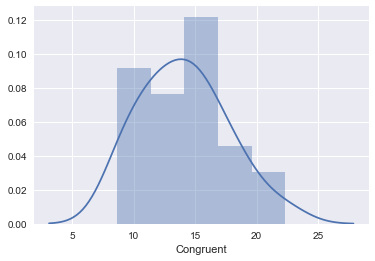

In [4]:
sns.distplot(df['Congruent'])

The data is more or less normally distributed. And just like we saw before, the middle of the data is a little bit less than 15.

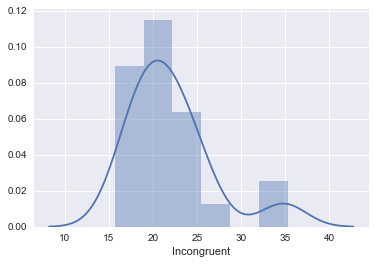

In [5]:
sns.distplot(df['Incongruent'])

There are some interesting data points on the upper end of this distribution that skew it right, other than that, it looks like we expected it to be.

5) **Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

In [6]:
# Make sure that our samples are of the same size, and show that size
print(df['Congruent'].size)
print(df['Incongruent'].size)

24
24


In [7]:
# Get the t-critical value for a 95% confidence level and 23 d.f.
t.ppf(.95, 23)

1.7138715277470473

For a confidence level of 95% and 23 degrees of freedom, our t-critical value ends up being **1.7139**

Our point estimate for the difference of the means is: 22.02 - 14.05 = **7.97**

Our standard deviation of the differences is calculated below.

In [8]:
df['Difference'] = df['Congruent'] - df['Incongruent']
df['Difference'].std(axis=0)

4.8648269103590556

This means our t-statistic will be:

In [9]:
7.97/(4.8648 / math.sqrt(24))

8.025996238275749

Because our t-statistic (**8.02**) is greater than our critical value (**1.7139**), we can reject the null hypothesis. This means that it *does* take much less time to do the congruent task than it does to do the incongruent task. This matches up with what we expected.

---

1. This is based on information found at [Statistics How-to](http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/).